# Task 2 - Association Mining

In [60]:
import pandas as pd

df = pd.read_csv('datasets/POS_TRANSACTIONS.csv')
#df.head(10)

In [61]:
# combine rows with same transaction and product name and sum quantity
df2 = df.groupby(['Transaction_Id','Product_Name'], as_index=False).agg('sum')

# remove column not needed
df2.drop(columns=['Location'], inplace=True)

In [62]:
transactions = df2.groupby(['Transaction_Id'])['Product_Name'].apply(list)
#transactions.get_values()

In [59]:
from apyori import apriori

#type cast transacts from pd into reg list and run apriori
transaction_list = list(transactions)
results = list(apriori(transaction_list, min_support=0.03))

#print(results[:5])

In [63]:
def convert_apriori_results_to_pandas_df(results):
    rules = []
    
    for rule_set in results:
        for rule in rule_set.ordered_statistics:
            # items_base = left side of rules, items_add = right side
            # support, confidence and lift for respective rules
            rules.append([','.join(rule.items_base), ','.join(rule.items_add),
                         rule_set.support, rule.confidence, rule.lift]) 
    
    # typecast it to pandas df
    return pd.DataFrame(rules, columns=['Left_side', 'Right_side', 'Support', 'Confidence', 'Lift']) 

result_df = convert_apriori_results_to_pandas_df(results)

#print(result_df.head(20))

In [64]:
# sort all acquired rules descending by lift
result_df = result_df[result_df['Left_side'] != '']
result_df = result_df.sort_values(by='Lift', ascending=False)
result_df.head(10)

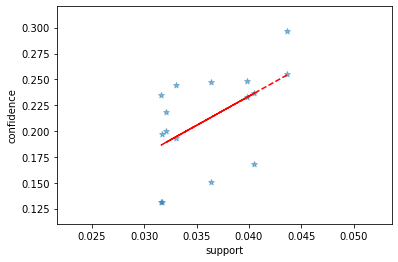

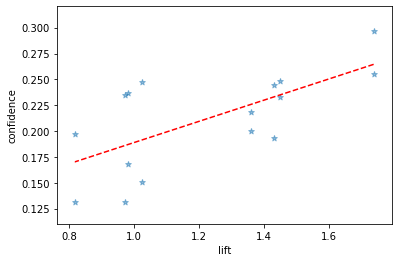

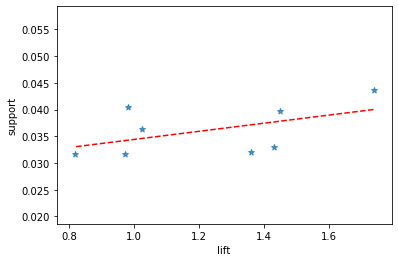

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

features = ['Support', 'Confidence', 'Lift']

support = result_df['Support']
confidence = result_df['Confidence']
lift = result_df['Lift']

plt.scatter(support, confidence, alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
# plot trendline
z = np.polyfit(support, confidence, 1)
p = np.poly1d(z)
plt.plot(support,p(support),"r--")
plt.show()

plt.scatter(lift, confidence, alpha=0.5, marker="*")
plt.xlabel('lift')
plt.ylabel('confidence')
# plot trendline
z = np.polyfit(lift, confidence, 1)
p = np.poly1d(z)
plt.plot(lift,p(lift),"r--")
plt.show()

plt.scatter(lift, support, alpha=0.5, marker="*")
plt.xlabel('lift')
plt.ylabel('support') 
# plot trendline
z = np.polyfit(lift, support, 1)
p = np.poly1d(z)
plt.plot(lift,p(lift),"r--")
plt.show()

## Bread Info

In [66]:
# filter out bread, use parrallel processing for speedup of intensive function
from multiprocessing import Pool
import multiprocessing as mp

bread_transactions = transactions

def process(series):
    for index, value in series.items():
        if 'Bread' not in value:
            series.drop(index=[index], inplace=True)
    return series

def multi(series):
    num_cores = mp.cpu_count() - 1
    chunks =[series[i::num_cores] for i in range(num_cores)]
    pool = Pool(processes=num_cores)
    result = pool.map(process, chunks)
    
    return pd.concat(result)

transactions = multi(bread_transactions)

In [67]:
#type cast transacts from pd into reg list and run apriori
transaction_list = list(transactions)
results = list(apriori(transaction_list, min_support=0.05))

#print(results[:5])

In [68]:
def convert_apriori_results_to_pandas_df(results):
    rules = []
    
    for rule_set in results:
        for rule in rule_set.ordered_statistics:
            # items_base = left side of rules, items_add = right side
            # support, confidence and lift for respective rules
            rules.append([','.join(rule.items_base), ','.join(rule.items_add),
                         rule_set.support, rule.confidence, rule.lift]) 
    
    # typecast it to pandas df
    return pd.DataFrame(rules, columns=['Left_side', 'Right_side', 'Support', 'Confidence', 'Lift']) 

result_df = convert_apriori_results_to_pandas_df(results)

#print(result_df.head(20))

In [69]:
# sort all acquired rules descending by lift
result_df = result_df.sort_values(by='Lift', ascending=False)
result_df = result_df[result_df['Left_side'] != '']
result_df.head(50)

,Left_side,Right_side,Support,Confidence,Lift
24,"Conditioner,Bread",Butter,0.050050,0.603087,2.906146
23,"Bread,Butter",Conditioner,0.050050,0.241182,2.906146
20,Conditioner,Butter,0.050050,0.603087,2.906146
19,Butter,Conditioner,0.050050,0.241182,2.906146
27,"Bread,Tea",Butter,0.066063,0.498963,2.404396
22,Tea,Butter,0.066063,0.498963,2.404396
26,"Bread,Butter",Tea,0.066063,0.318342,2.404396
21,Butter,Tea,0.066063,0.318342,2.404396
15,Bread,Tea,0.132400,0.132400,1.000000
25,"Conditioner,Butter",Bread,0.050050,1.000000,1.000000
